In [1]:
import pandas as pd

# Load both files
zomato = pd.read_csv("zomato.csv", encoding='latin-1')
country = pd.read_excel("Country-Code.xlsx")

# Merge on Country Code
df = pd.merge(zomato, country, on='Country Code', how='left')

# Show basic info
print(df.shape)
df.head()

(100, 8)


,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Aggregate rating,Votes,Country
0,Biryani House,14,Hyderabad,Healthy Food,1200,3.5,794,Australia
1,Biryani House,1,Mumbai,Healthy Food,700,4.8,503,India
2,Tandoori Zone,1,New Delhi,Asian,700,4.8,974,India
3,Tandoori Zone,14,Hyderabad,Pizza,300,4.4,549,Australia
4,Biryani House,14,Chennai,South Indian,300,3.1,542,Australia


In [5]:
print(df.columns.tolist())

['Restaurant Name', 'Country Code', 'City', 'Cuisines', 'Average Cost for two', 'Aggregate rating', 'Votes', 'Country']


In [7]:
df = df[['Restaurant Name', 'City', 'Country', 'Cuisines', 
         'Average Cost for two', 'Aggregate rating', 'Votes']]

In [11]:
# Clean dropna (safe version)
df = df.dropna(subset=['Cuisines', 'Aggregate rating', 'Votes'])

# Safely convert to numeric types
df.loc[:, 'Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df.loc[:, 'Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df.loc[:, 'Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce')

/var/folders/hl/ryxkz6jx1l9d8tv4sxrcmvdw0000gn/T/ipykernel_1494/3006683938.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='mako')


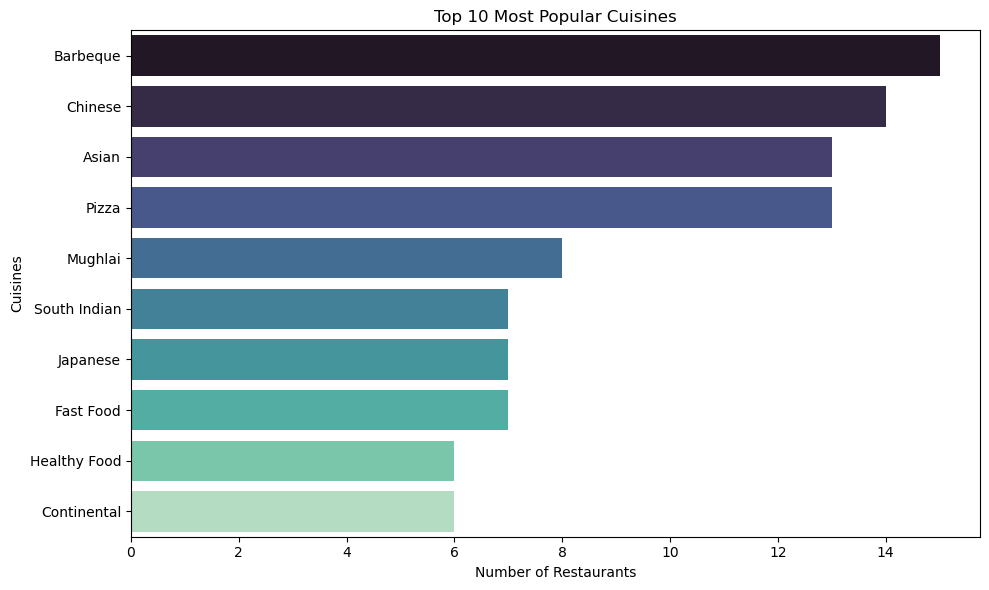

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

top_cuisines = df['Cuisines'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='mako')
plt.title("Top 10 Most Popular Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.tight_layout()
plt.savefig("plots/top_cuisines.png")
plt.show()

/var/folders/hl/ryxkz6jx1l9d8tv4sxrcmvdw0000gn/T/ipykernel_1494/2294813740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette="flare")


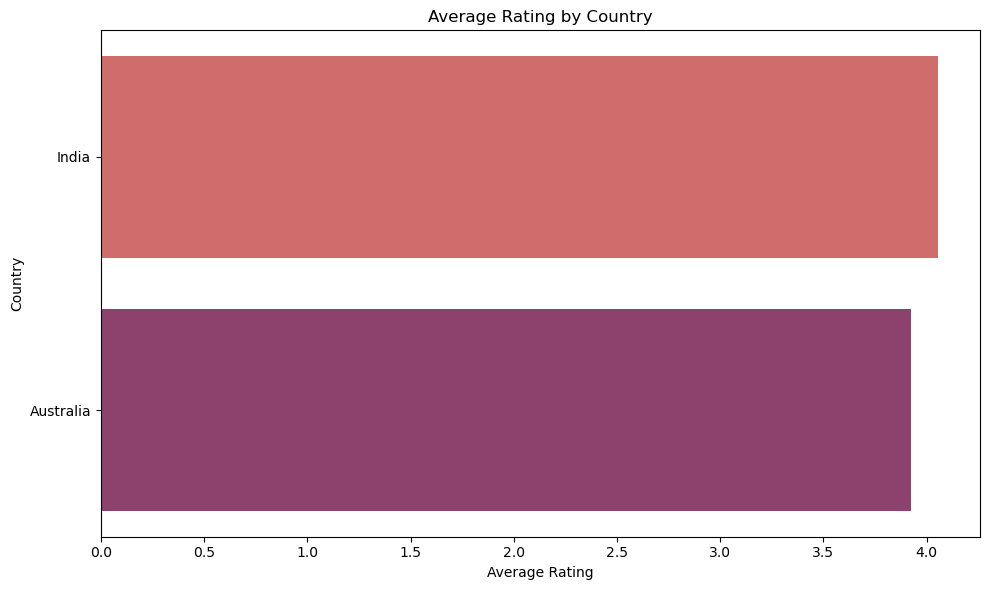

In [15]:
avg_rating = df.groupby("Country")["Aggregate rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette="flare")
plt.title("Average Rating by Country")
plt.xlabel("Average Rating")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("plots/avg_rating_by_country.png")
plt.show()

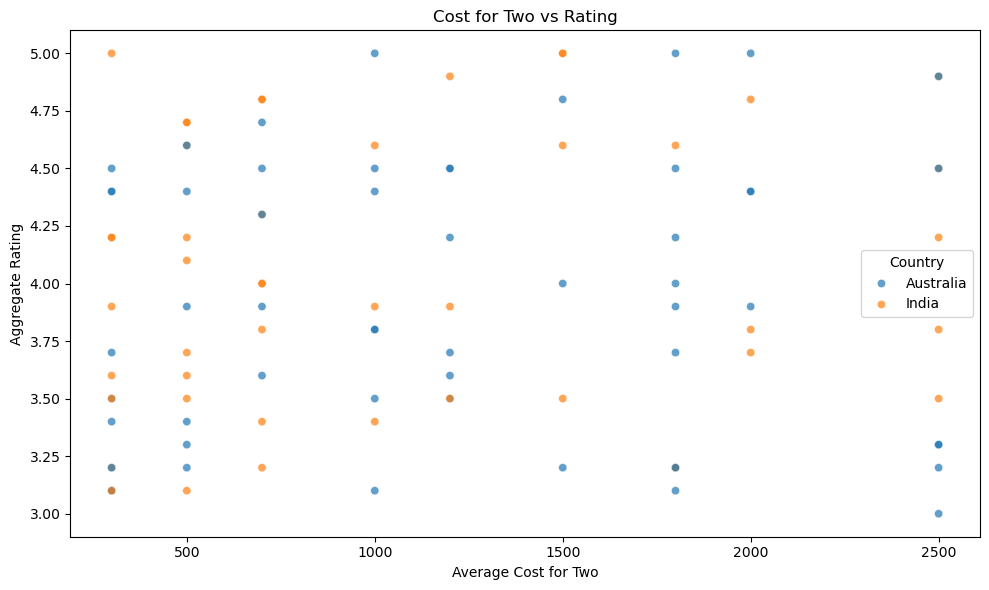

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Average Cost for two', y='Aggregate rating', hue='Country', alpha=0.7)
plt.title("Cost for Two vs Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.tight_layout()
plt.savefig("plots/cost_vs_rating.png")
plt.show()

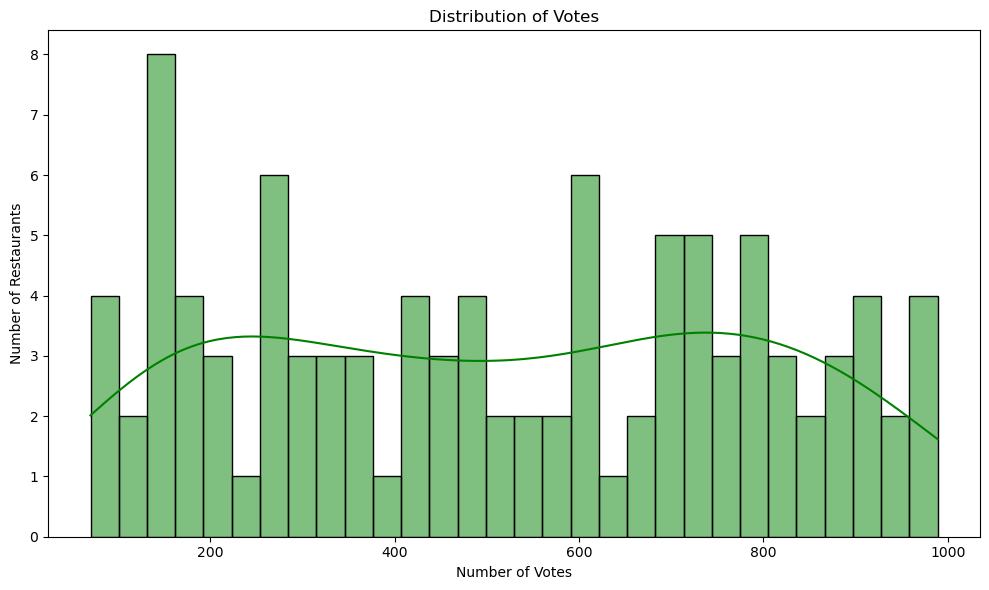

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['Votes'], bins=30, kde=True, color='green')
plt.title("Distribution of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.savefig("plots/votes_distribution.png")
plt.show()


/var/folders/hl/ryxkz6jx1l9d8tv4sxrcmvdw0000gn/T/ipykernel_1494/1560544640.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='rocket')


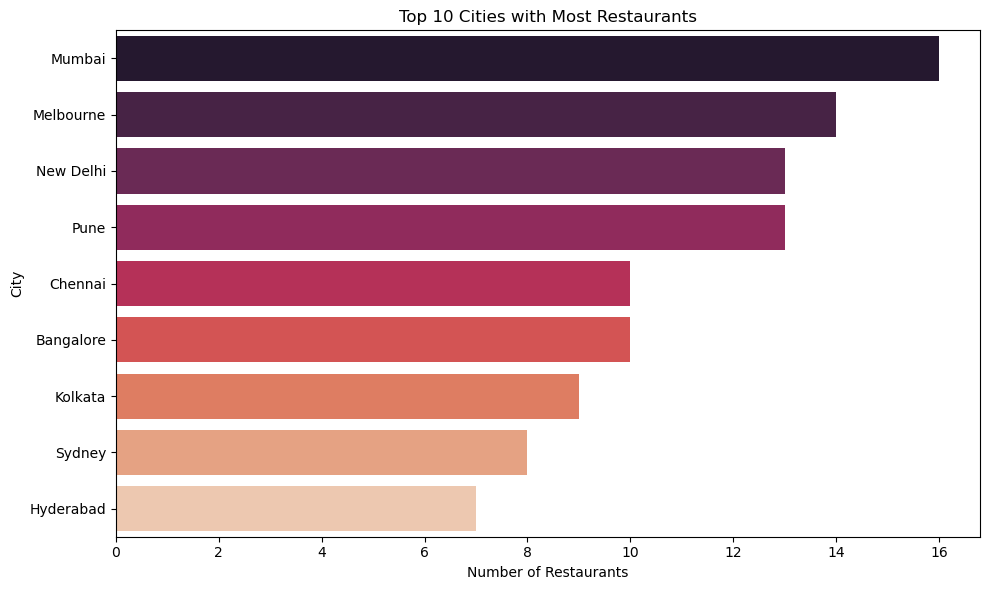

In [21]:
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='rocket')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("plots/top_10_cities.png")
plt.show()
